<a href="https://colab.research.google.com/github/marciorvneto/ml-course/blob/main/univariate-linear-regression/Univariate_Linear_Regression_Apartment_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's implement linear regression

### It's time to actually do some supervised learning!

In our last lecture, we posed a problem, where you'd be interested in predicting apartment prices $y$, based on their area $x$.

We chose **linear regression** as our model, and even derived equations for finding its parameters $a$ and $b$.

We're now going to go through all the steps required to **train** your model, and **assess** its performance.

## First things first

We begin by **importing** an extremely useful Python library called `numpy`. It provides us with many useful functions that we'll need for implementing our models.

To invoke this library into our project, we use the following command:

In [1]:
import numpy as np

This command accomplishes two things:
* It imports `numpy` into our project, and
* Allows us to refer to `numpy` using the alias `np`

Let us now import our dataset.

## Importing our data

The first step is to bring the apartment price data that we've collected into our project.

We'll do that with the help of another extremely useful library called `pandas`. It provides us with many useful functions for working with datasets. We import it using the following command:

In [2]:
import pandas as pd

Our apartment data has been stored in the *Comma-Separated Values* format, or CSV. If you're curious, you can learn more about CSV files here: https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/

We are going to use the `pandas` library to read our data into a `dataframe`, which is a convenient (and fast!) way of storing and manipulating it.

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/marciorvneto/ml-course/main/univariate-linear-regression/apartment_data.csv")

`pandas` gives us a nice visualization of our data.

In [4]:
dataset

,area,price
0,229.629630,132.373536
1,384.484484,145.327695
2,775.475475,378.289559
3,284.284284,183.186755
4,273.073073,270.536680
...,...,...
995,393.593594,227.448682
996,641.641642,237.778161
997,756.556557,335.609673
998,286.386386,267.636366


Here, our data is displayed as a table containing 1000 rows, and 2 columns, namely **area** and **price**.

A more convenient way of looking at our data is by drawing a **scatter plot**. We can do that in Python using a library called `matplotlib`, which comes with functions for drawing data.

This is an incredibly versatile library, and we'll have plenty of time to practice using it.

Let us begin by extracting the values of apartment prices, and apartment areas from the columns **area**, and **price**, respectively:

In [5]:
x = dataset["area"]     # Take the column "area" and store it in the variable x
y = dataset["price"]    # Take the column "price" and store it in the variable y

Now we can import the `pyplot` module from `matplotlib`. This module contains several functions for plotting data. As before, we'll give it a short alias for convenience: `plt`

In [6]:
import matplotlib.pyplot as plt

Now we can just plot the prices contained in `y` versus the area contained in `x`. We'll also label the x and y axes, and give our scatter plot a title.

Text(0.5, 1.0, 'Apartment prices dataset')

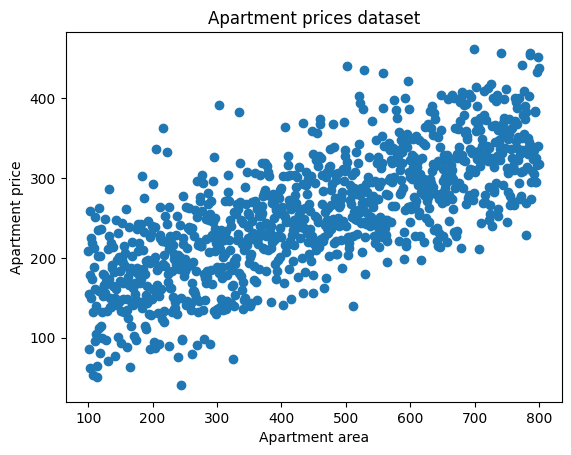

In [7]:
plt.plot(x, y, 'o')     # The third argument, 'o', tells the function to draw each data point as a circle
plt.xlabel("Apartment area")
plt.ylabel("Apartment price")
plt.title("Apartment prices dataset")

From this plot, we can see quite clearly that there's a linear upward trend in our dataset.

Great! That indicates that we're on the right track: linear regression may, indeed, be a good choice.

## Splitting the dataset into training and test sets

As we mentioned before, it is important to assess the performance of our model using data that has not been seen before during training. That is why we distinguish between **training data** and **test data**.

Let us *partition*, that is, split, our dataset in the following way: 70% of our data will go to our training set, and the remaining 30%, to our test set.

It is good practice to **shuffle** your data first, to get rid of any unwanted correlations in your training and test sets.

Why is this step necessary? Well, suppose our data is organized in a way where the first half of our data points correspond to apartments with area strictly lesser than 400 ft².

If we simply take the first data points to be our training data, our model will be **biased** towards apartments with smaller area, since most values it will have seen during training will have had this characteristic.

If we shuffle our data, however, we decrease the probability that something like that will happen.

### Shuffling the data

How do we actually shuffle our data? We can do that by using two functions provided by the `numpy` library: `arange`, and `shuffle`.

When we call the function `np.arange(N)`, it generates an array of integers ranging from `0` to `N`. Here's an example.

We'll create an array called `indices` containing integer values ranging from 0 to 5:

In [8]:
indices = np.arange(5)
print(indices)

[0 1 2 3 4]


If we wish to shuffle this array, all we have to do is call `np.random.shuffle(indices)`. This function will shuffle our array in place:

In [9]:
np.random.shuffle(indices)
print(indices)

[2 1 4 0 3]


One nice thing about `numpy`, is that it allows us to reorder arrays using an array of indices. Let's see an example.

Suppose we would like to reorder the following array:

`[10, 20, 30, 40]`

In such a way that the elements were put in the following order:

`[30, 10, 20, 40]`

In other words, the **first** element of our desired array, `30`, would be the **third** element of our original array. 

Since Python counts array indices starting from 0, the first element of our desired array would be the element of index 2 of the original array.

Likewise, the second element of our desired array, `10` corresponds to the first element of our original array (index 0).

The corresponding indices of the desired array, when compared to the original array are, therefore:

`[2, 0, 1, 3]`

Now that we have the indices array, it is straightforward to get the desired array from the original array using `numpy`. The code below does just that. Pretty handy, isn't it?

In [10]:
original_array = np.array([10,20,30,40])               # Create the original numpy array of indices
new_array_indices = np.array([2,0,1,3])                # Create the numpy array of indices
desired_array = original_array[new_array_indices]      # Create the desired array using the index
print(desired_array)

[30 10 20 40]


In [11]:
N = len(dataset)            # Get the number of points N in our dataset
indices = np.arange(N)      # Generate an array of integer numbers from 0 to N: 0,1,2,3,...,N
np.random.shuffle(indices)  # Shuffle the indices

percent_train = 0.7
N_train = int(N * percent_train)
N_test = N - N_train

train_indices = indices[:N_train]  # Take the first N_train indices and store them in train_indices
test_indices  = indices[N_train:]  # Take the last indices, starting from N_train, and store them in test_indices

x_train, y_train = x[train_indices], y[train_indices]
x_test, y_test = x[test_indices], y[test_indices]

It's helpful to visualize our test data, and our training data in the same scatter plot. We plot the training data in blue, and the test data in red.

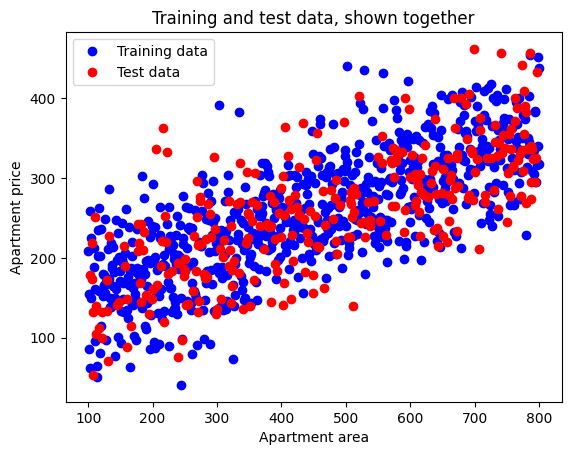

In [12]:
plt.plot(x_train, y_train, "bo")
plt.plot(x_test, y_test, "ro")
plt.xlabel("Apartment area")
plt.ylabel("Apartment price")
plt.title("Training and test data, shown together")
plt.legend(["Training data", "Test data"])

## Finding the model parameters `a` and `b`

Now we're ready to use our training data to find the model parameters. Recall from our lecture that we need to calculate some sums: $S_x$, $S_y$, $S_{xy}$, and $S_{x^2}$.

Lucky for us, `numpy` makes this extremely easy to do:

In [13]:
Sx = np.sum(x_train.values)
Sy = np.sum(y_train.values)
Sxy = np.sum(x_train.values*y_train.values)
Sx2 = np.sum(x_train.values**2)        # In Python the double asterisk means exponentiation. 
                                # Doing x_train**2 means squaring each element of x_train

Now we calculate the linear regression parameters using the expressions we saw in the last lecture:

$$a = \frac{N S_x - S_x S_y}{N S_{x^2} - S_x^2}$$
$$b = \frac{S_{x^2} S_y - S_{xy} S_x}{N S_{x^2} - S_x^2}$$


In [14]:
a = (N_train * Sxy - Sx*Sy)/(N_train * Sx2 - Sx ** 2)
b = (Sx2 * Sy - Sxy*Sx)/(N_train * Sx2 - Sx ** 2)

print(f"Model parameter a: ", a)
print(f"Model parameter b: ", b)

Model parameter a:  0.2893848082650594
Model parameter b:  126.21462314029955


Now that we have found our model parameters, let's see how it compares to our training data

Text(0.5, 1.0, 'Trained model')

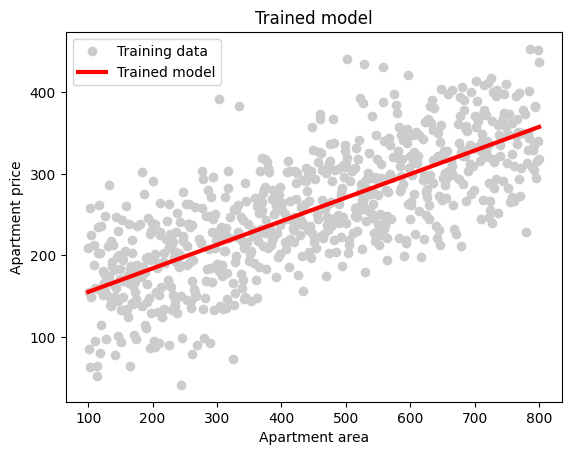

In [15]:
x_plot = np.linspace(np.min(x_train), np.max(x_train))
y_plot = a * x_plot + b
plt.plot(x_train, y_train, 'o', color="0.8")
plt.plot(x_plot, y_plot, 'r', linewidth=3)
plt.legend(["Training data","Trained model"])
plt.xlabel("Apartment area")
plt.ylabel("Apartment price")
plt.title("Trained model")

## Assessing our model's performance

Wonderful, we have just determined the parameters $a$ and  $b$ for our model. From the graph above, we can see that our model does a good job at capturing our data's general upward trend.

But we can be much more specific than that.

In our last lecture, we talked about the mean squared error, or MSE. We'll implement it here and use it to quantify the error that our model makes over the training set, and over the test set.

In other words, we'll use the MSE to calculate our **training error** and our **test error**.

Let us define a function that, given an array of apartment areas `x` , and their correct prices `y`, calculates our model's MSE: 

In [16]:
def mse(x, y):
    N_data = len(x)                                 # Number of data points
    y_hat = a* x + b                                # The prices, as predicted by the model
    return 1/N_data * np.sum((y_hat - y)**2)        # Definition of MSE

Let us now calculate our training and test errors:

In [17]:
training_error = mse(x_train, y_train)
test_error = mse(x_test, y_test)

print(f"Training error: ", training_error)
print(f"Test error: ", test_error)

Training error:  2655.106802366489
Test error:  2862.2746733576846
